# Triple-A Ames Housing Price Model (Part 2)

<img src = " ../images/cover.png" alt = "cover"/>

([*Source*](https://media-exp1.licdn.com/dms/image/C4E1BAQGf37i29AlqpA/company-background_10000/0/1519797978841?e=2159024400&v=beta&t=pq_e4S0CiEzot02fMRP28sNdyXFtJHWtmkgfHiMse4w))

## Table of Contents 

### Author Forenote  

### Part 1 (refer to Notebook 1)
#### Section 1 (The Data Science Problem)  
1.1.1 Background Information on Ames (Iowa, US)  
1.1.2 Problem Statement  
1.1.3 Model Framework  
1.1.4 Additional Research    

#### Section 2 (Exploratory Data Analysis)  
1.2.1 Preliminary Dataset Inspection  
    - Discrete Variables  
    - Continuous Variables  
    - Ordinal Variables  
    - Nominal Variables  
1.2.2 Examine Target Variable (Sale Price)  

#### Section 3 (Data Cleaning)  
1.3.1 Outliers  
1.3.2 Missing Values  
    - Columns with Over Half Values Missing  
    - Lot Frontage  
    - Veneer Features  
    - Basement Features  
    - Fireplace Quality  
    - Garage Features  
1.3.3 Convert Datatype  

#### Part 1 Summary  

### Part 2  
#### [Section 1 (Preprocessing)](#section1)   
[2.1.1 Modal Skewed Features](#2.1.1)   
[2.1.2 Score Relevant Features](#2.1.2)  
    - [Neighbourhood](#neighbourhood)  
    - [Zoning](#zoning)  
    - [Land Contour](#landcontour)  
[2.1.3 Categorize Features](#2.1.3)     

#### [Section 2 (Data Visualization & Feature Engineering)](#section2)   
[2.2.1 Geography](#2.2.1)    
[2.2.2 Parcellation](#2.2.2)    
[2.2.3 Internal Built Environment](#2.2.3)    
[2.2.4 External Built Environment](#2.2.4)    
[2.2.5 Miscellaneous](#2.2.5)    

#### [Part 2 Summary](#part2summary)

### Part 3 (refer to Notebook 3)
#### Section 1 (Modelling & Assessment)
3.1.1 Establish Baseline Score  
3.1.2 Regularization & Model Tuning  
    - Ordinary Lease Squares (OLS)  
    - Ridge  
    - Lasso  
    - Elastic Net  
3.1.3 Model Evaluation & Statistical Inference  
    - Model Coefficients  
    - Model Scores  
3.1.4 Production Model   
3.1.5 Test Dataset Application  

#### Section 2 (Recommendations)  

3.2.1 Primary Assumptions  
3.2.2 Recommendations  
3.3.3 Looking Forward  

### Conclusion
---

<div id="part1"></div>

## Part 2
<div id="section1"></div>

Before anything else, we reload the relevant libraries and import the cleaned dataset from Part 1. 


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind
from numpy import array
from functools import reduce

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression

%matplotlib inline


In [2]:
# Import cleaned train dataset as pd df
train_clean_df = pd.read_csv("../data/train_clean.csv")


In [3]:
# Quick check that dataset is in tact
pd.set_option('display.max_columns', None)

train_clean_df.head() # No issues with features and data type for ordinal variables


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,log_saleprice
0,109,533352170,60,RL,60.0,13517,Pave,2,Lvl,3,CulDSac,2,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,2,Y,4,725,754,0,1479,0,0,2,1,3,1,3,6,7,0,0,Attchd,2,2,475.0,3,3,2,0,44,0,0,0,0,0,3,2010,WD,130500,11.779129
1,544,531379050,60,RL,43.0,11492,Pave,2,Lvl,3,CulDSac,2,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,2,Y,4,913,1209,0,2122,1,0,2,1,4,1,3,8,7,1,3,Attchd,2,2,559.0,3,3,2,0,74,0,0,0,0,0,4,2009,WD,220000,12.301383
2,153,535304180,20,RL,68.0,7922,Pave,3,Lvl,3,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,4,1057,0,0,1057,1,0,1,0,3,1,3,5,7,0,0,Detchd,1,1,246.0,3,3,2,0,52,0,0,0,0,0,1,2010,WD,109000,11.599103
3,318,916386060,60,RL,73.0,9802,Pave,3,Lvl,3,Inside,2,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,2,Y,4,744,700,0,1444,0,0,2,1,3,1,2,7,7,0,0,BuiltIn,3,2,400.0,3,3,2,100,0,0,0,0,0,0,4,2010,WD,174000,12.066811
4,255,906425045,50,RL,82.0,14235,Pave,2,Lvl,3,Inside,2,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,2,Y,4,831,614,0,1445,0,0,2,0,3,1,2,6,7,0,0,Detchd,1,2,484.0,3,3,0,0,59,0,0,0,0,0,3,2010,WD,138500,11.838626


In [4]:
train_clean_df.shape


(2047, 77)

<div id="section1"></div>

### Section 1 (Preprocessing)
<div id="2.1.1"></div>

#### 2.1.1 Modal Skewed Features 

With reference to Part 1 Section 1.2.1 (Exploratory Data Analysis - Nominal Variables), the following features were identified as heavily skewed due to significant modal values accounting for a great majority of the all observations: 
- Street
- Condition 2
- Roof Material
- Heating
- Central Air

We reload the bar graphs for these features to verify: 


In [5]:
def cat_bars(df, column_list):
    fig, ax = plt.subplots(int(np.ceil(len(column_list) / 2)), 2, figsize = (12, 14))
    ax = ax.ravel()
    for i, col in enumerate(column_list):
        sns.countplot(data = df, x = col, ax = ax[i])
        plt.setp(ax[i].get_xticklabels(), rotation = 90, fontsize = 10)
    if len(column_list) < 2 * int(np.ceil(len(column_list)/2)):
        for i in range(2 * int(np.ceil(len(column_list)/2)) - len(column_list)):
            ax[2 * int(np.ceil(len(column_list)/2)) - 1 - i].set_axis_off()
    fig.tight_layout()
    

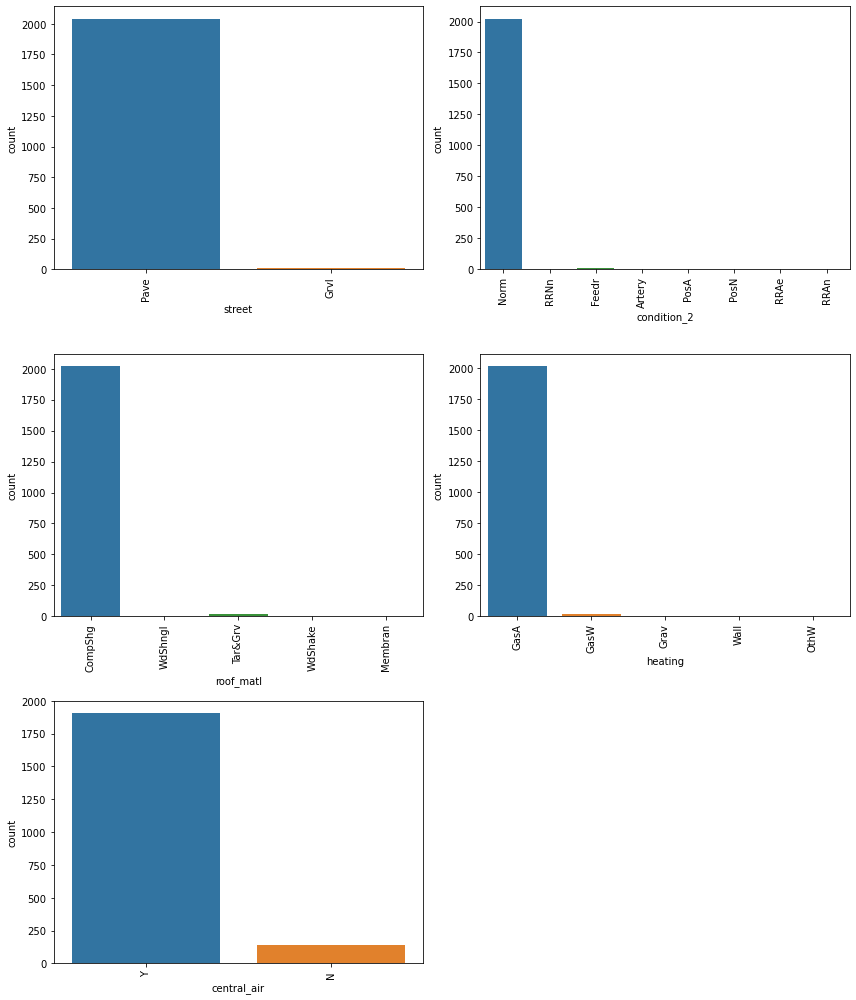

In [6]:
cat_bars(train_clean_df, ['street', 'condition_2', 'roof_matl', 'heating', 'central_air'])


Given the heavy skews exhibited, we proceed to drop these features as the severe lack of non-modal datapoints means that their respective effects on housing sale prices cannot be fairly and accurately captured due to no basis for comparison. 

In [7]:
train_clean_df = train_clean_df.drop(columns = ['street', 'condition_2', 'roof_matl', 'heating', 'central_air'])

train_clean_df.shape # 5 columns dropped accordingly


(2047, 72)

<div id="2.1.3"></div>

#### 2.1.3 Score Relevant Features

<div id="neighbourhood"></div>

##### Neighbourhood

While some features are classified as nominal, a rudimentary understanding of the realty industry would suggest otherwise. Specifically, there is likely to exist some degree of ranking within the feature, the most glaring feature being neighbourhood. Afterall, where property values are concerned, some argue that it is all about "location, location, location". Indisputably, every house buyer knows that geographical location is a key determinant factor of house price. This encompasses neighbourhoods with a surplus of amenities, schools, retail, communal/recreational facilities, among other desirable traits. 

Ideally, we split the various neighbourhoods into different bands based on socio-economic status, using an independent economic indicator such as GDP per capita. However, due to the lack of data available on economic indicators at the neighbourhood scale for Ames, we will adopt a more simplified approach by splitting the neighbourhoods based on sale price of houses. While there is some internal conflict in that the target variable (sale price) is used as a function of a predictor variable (neighbourhood), this is the most viable method given the unavailability of additional data. To confirm a socio-economic hierarchy exist within neighbourhoods, we compare them in sorted order to sale price. 


In [8]:
train_clean_df.saleprice.describe() # Get a sensing on sale price distribution


count      2047.000000
mean     181373.477284
std       79261.707403
min       12789.000000
25%      129650.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

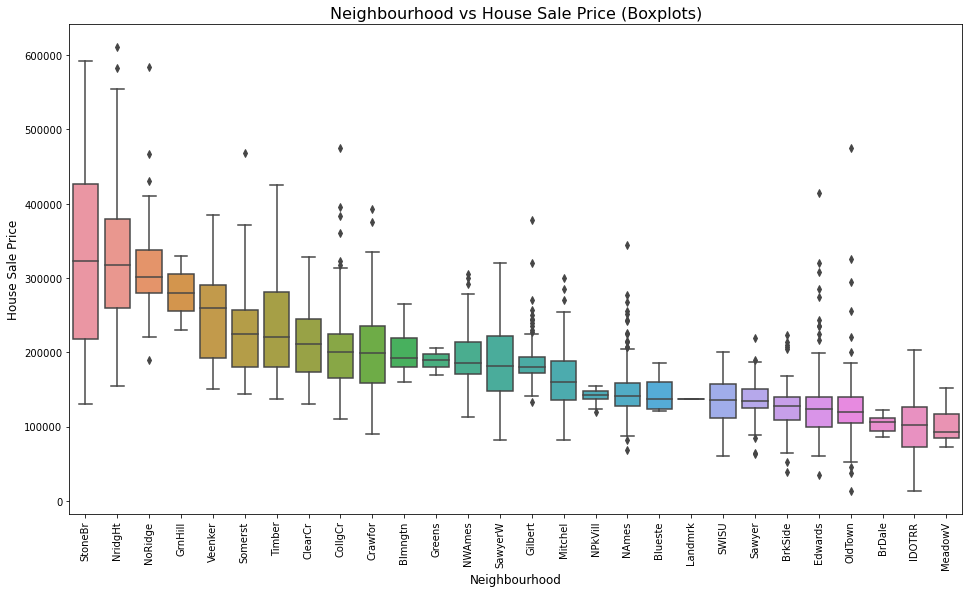

In [9]:
# Visualize neighbourhood vs sale price using box plots
neigh_median = train_clean_df.groupby('neighborhood')['saleprice'].median()
neigh_median.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(figsize = (16, 9))

sns.boxplot(x = 'neighborhood', y = 'saleprice', data = train_clean_df, order = list(neigh_median.index))

ax.set_ylabel("House Sale Price", size = 12)
ax.set_xlabel("Neighbourhood", size = 12)

plt.xticks(rotation = 90)

ax.set_title("Neighbourhood vs House Sale Price (Boxplots)", size = 16)

plt.show()


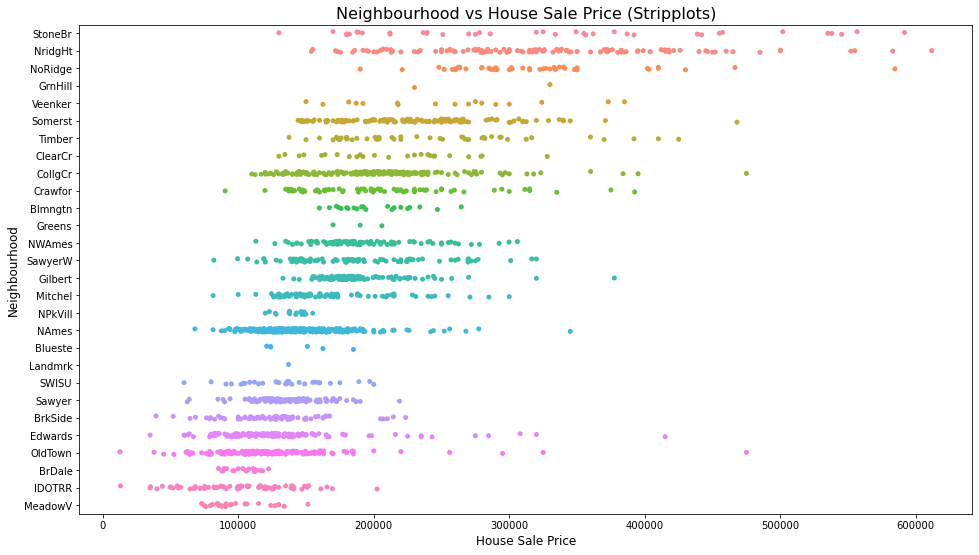

In [10]:
# Visualize neighbourhood vs sale price using box plots
fig, ax = plt.subplots(figsize = (16, 9))

sns.stripplot(x = 'saleprice', y = 'neighborhood', data = train_clean_df, jitter = True, order = list(neigh_median.index))

ax.set_ylabel("Neighbourhood", size = 12)
ax.set_xlabel("House Sale Price", size = 12)

ax.set_title("Neighbourhood vs House Sale Price (Stripplots)", size = 16)

plt.show()


Both visualizations above affirms the ranked variation in house sale prices with neighbourhood. We will split the neighbourhoods into 4 groups of 7 based on their mean sale price. Variations in housing prices across neighbourhoods are not immediately apparent from a data perspective. Instead, through a spatial lens by scrutinizing Fig 1.1 (Ames Comprehensive Plan 2040) under Part 1.1.1 (The Data Science Problem - Background Information on Ames (Iowa, US)), the neighbourhood with the lowest median house sale price (Meadow Village) is located within the designated airport protection zone, which means that houses in the area are likely affected by noise disamenities generated from airport activities (e.g. plane landing and take off). It is perhaps not a coincidence that the neighbourhood with the highest median house sale price (Stone Brook) is located right on the opposite side of town, surrounded by green spaces/water bodies (Ada Hayden Heritage Park Lake - see Fig. 2.1 below) and with convenient access to Ames Golf & Country Club.  

<img src = " ../images/park.png" alt = "park"/>

*Fig 2.1 Ada Hayden Heritage Park Lake* ([*Source*](https://lh5.googleusercontent.com/p/AF1QipNEgM_m5-Yl5wQgHY7aAvDg-O3naN68dZLtFDUl=w408-h306-k-no))

In [11]:
print(len(train_clean_df.neighborhood.unique())) # 28 unique neighbourhoods
print("")
print(train_clean_df.neighborhood.unique()) # Unique names of the 28 neighbourhoods

train_clean_df.groupby('neighborhood')['saleprice'].agg(['count', 'mean']).sort_values('mean').round() 


28

['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']


,count,mean
neighborhood,,
MeadowV,24,100231.0
IDOTRR,69,101103.0
BrDale,19,103371.0
OldTown,163,125276.0
BrkSide,76,127023.0
Edwards,141,129906.0
SWISU,32,134759.0
Landmrk,1,137000.0
Sawyer,111,137182.0


In [12]:
# Reload the custom function for mapping ordinal values
def fill_map(col, replace_na_value, ord_dict, data = train_clean_df):
    if replace_na_value is not None:
        result = data.loc[:, col].fillna(replace_na_value)
    else: 
        result = data.loc[:, col]
    result = result.replace(ord_dict)
    return result


In [13]:
# Score neighbourhood
train_clean_df['neighborhood'] = fill_map('neighborhood', None, {'MeadowV': 1, 
                                                                 'IDOTRR' : 1, 
                                                                 'BrDale' : 1, 
                                                                 'OldTown': 1, 
                                                                 'BrkSide': 1, 
                                                                 'Edwards': 1, 
                                                                 'SWISU': 1, 
                                                                 'Landmrk':2, 
                                                                 'Sawyer':2, 
                                                                 'NPkVill':2, 
                                                                 'Blueste':2, 
                                                                 'NAmes':2, 
                                                                 'Mitchel':2, 
                                                                 'SawyerW':2, 
                                                                 'Greens':3, 
                                                                 'Gilbert':3, 
                                                                 'NWAmes':3, 
                                                                 'Blmngtn':3, 
                                                                 'CollgCr':3, 
                                                                 'Crawfor':3, 
                                                                 'ClearCr':3, 
                                                                 'Somerst':4, 
                                                                 'Timber':4, 
                                                                 'Veenker':4, 
                                                                 'GrnHill':4, 
                                                                 'StoneBr':4, 
                                                                 'NoRidge':4, 
                                                                 'NridgHt':4,})

train_clean_df.neighborhood.head() # Scoring for neighbourhood successful


0    2
1    2
2    2
3    4
4    2
Name: neighborhood, dtype: int64

In [14]:
train_clean_df.groupby('neighborhood')['saleprice'].agg(['mean','count']) 
# Incidentally, we achieve good observation count across the 4 neighbourhood scoring bands


,mean,count
neighborhood,,
1,122229.927481,524
2,152986.122150,614
3,198847.726190,504
4,279185.908642,405


<div id="zoning"></div>

##### Zoning

The treatment for the ms_zoning feature relied heavily on domain knowledge. If assessed solely based on data alone, one might either houses on land zoned non-residential as outliers since there are only a handful of them and consequently remove the rows, or simply drop the feature altogether on the basis of modal skewness. 


<AxesSubplot:xlabel='ms_zoning', ylabel='count'>

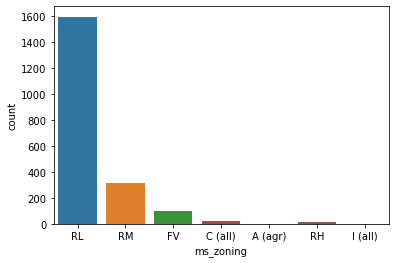

In [15]:
sns.countplot(x = train_clean_df.ms_zoning)


In [16]:
train_clean_df.groupby('ms_zoning')['saleprice'].agg(['mean','count']) 


,mean,count
ms_zoning,,
A (agr),47300.000000,2
C (all),78010.894737,19
FV,218618.316832,101
I (all),57625.000000,1
RH,148859.571429,14
RL,191136.099749,1594
RM,129119.142405,316


Instead, leveraging on domain knowledge on urban planning, we will a leap of faith in assigning scores to the respective zonings based on their potential economic returns. The logic for doing so is because zonings are ascribed to land plots rather rather than the houses per se. Hence, houses on land plots with higher-value zonings have greater development potential. This will invariably will downstream implications when the house owner eventually sells his/her house; a higher premium may be charged due to the permissible higher-value uses allowed to be developed on the subject land plot. As the [*Ames planning division website*](https://www.cityofames.org/government/departments-divisions-i-z/legal/city-of-ames-municipal-code/zoning-table-of-contents-municipal-code-chapter-29) does not indicate values of the respective land zonings, we will adopt the following ranking based on projected economic returns:  

Commercial > Industry > Agriculture > Floating Village Residential > Residential Low Density > Residential Medium Density > Residential High Density  

Commercial zonings naturally command the highest land value given their nature, followed by industrial and agricultural uses. We assign a higher value for residential (floating village) zoning as the name alludes to a waterfront land plot which is generally perceived more attractive/desirable. Among the remaining residential zonings, land value is inversely related to density on the basis that quality of life declines as living space becomes increasingly congested. 



In [17]:
# Score zoning
train_clean_df['ms_zoning'] = fill_map('ms_zoning', None, {'C (all)': 7, 
                                                           'I (all)': 6, 
                                                           'A (agr)': 5, 
                                                           'FV': 4, 
                                                           'RL': 3, 
                                                           'RM': 2, 
                                                           'RH': 1}) 

train_clean_df.ms_zoning.head() # Scoring and dtype conversion for ms_zoning successful


0    3
1    3
2    3
3    3
4    3
Name: ms_zoning, dtype: int64

<div id="landcontour"></div>

##### Land Contour

This feature may be scored also as a flatter land plot would be more conducive for development. To recap the degrees of measure: 
- Lvl - Near Flat/Level	
- Bnk - Banked - Quick and significant rise from street grade to building
- HLS - Hillside - Significant slope from side to side
- Low - Depression

As it is difficult to distinguish between the latter three, we will implement a simple scoring system of 1 for near flat/level land and 0 for others. 


In [18]:
# Score land contour
train_clean_df['land_contour'] = fill_map('land_contour', None, {'Bnk': 0, 'HLS': 0, 'Low': 0, 'Lvl': 1}) 

train_clean_df.land_contour.head() # Scoring for land_contour successful


0    1
1    1
2    1
3    1
4    1
Name: land_contour, dtype: int64

<div id="2.1.4"></div>

#### 2.1.4 Categorize Features

To prepare the dataset for feature engineering, we will rearrange and organize the features into categories based on similarities. This process will involve tapping into domain knowledge on urban planning and the realty market, as well as an astute discernment on features with parallels. The purpose of categorizing is three-fold:  
i) Break the dataset down into digestable components for further collinearity analysis. Given that the features will be grouped according to their properties, relationships between them may be identified more easily.  
ii) Measure the respective baskets against housing prices as part of the assessment to determine which have a stronger influence on the target variable.  
iii) Based on the underlying framework which the model will be built upon (as stated under (b) problem statement), one of the key objective is to create an *accessible* model. Hence, organizing the features into baskets with general headers understood by laypeople will help achieve this, as compared to retaining the current classification (discrete, continuous, ordinal, nominal) which is the language of data scientists and statisticians intended for assessment.  


|Geography|Parcel|Internal Built Environment|External Built Environment|Miscellaneous|
|---|---|---|---|---|
|PID|Lot Area|Gr Liv Area|Exter Qual|ID|
|Neighbourhood|Lot Shape|1st Flr SF|Exter Cond|Year Built|
|Overall Qual|Lot Config|2nd Flr SF|Foundation|Year Remod/Add|
|Overall Cond|Lot Frontage|Low Qual Fin SF|Garage Area|Yr Sold|
|Condition 1|Land Contour|TotRms AbvGrd|Garage Cars|Mo Sold|
|MS Zoning|Land Slope|Bedroom AbvGr|Garage Type|Utilities|
|MS SubClass|Paved Drive|Kitchen AbvGr|Garage Qual|Heating QC|
|Building Type||Kitchen Qual|Garage Cond|Electrical|
|House Style||Full Bath|Garage Finish|Functional|
|||Half Bath|Roof Style|Misc Val|
|||Fireplaces|Exterior 1st|Sale Type|
|||Fireplace Qu|Exterior 2nd||
|||Total Bsmt SF|Mas Vnr Area||
|||BsmtFin SF 1|Mas Vnr Type||
|||BsmtFin SF 2|Wood Deck SF||
|||Bsmt Unf SF|Open Porch SF||
|||Bsmt Qual|Enclosed Porch||
|||Bsmt Cond|3Ssn Porch||
|||Bsmt Exposure|Screen Porch||
|||BsmtFin Type 1|Pool Area||
|||BsmtFin Type 2|||
|||Bsmt Full Bath|||
|||Bsmt Half Bath|||




Elaborating further on the 5 defined categories:  
a) Geography (9 features)  
- PID is included in this basket as it serves as a geo-identifier.   
- Neighbourhood considers the larger geographical area about the subject house.    
- The inclusion of overall quality and overall condition under this basket rather than internal/external built environments might be surprising. This was one of the challenging decisions as the two variables are applied to both internal and external built environments. Ultimately, I included overall quality and overall condition under the 'Geography' basket on the assumption that housing quality/condition varies with the socio-economic status of neighbourhoods. This is apropos of US cities especially for suburban residential areas, where houses of similar status and residential demographics are clustered together.  
- Condition 1 and Condition 2 are measures of relative distance within the local transport network.  
- MS zoning is the landuse zoning for a given area stipulated by the Ames municipal government and hence, is placed in this basket.  
- The last three features are all related to house type/style and hence, are grouped together. 

b) Parcellation (7 features)  
- The first six features deal with the site conditions ranging from area to configuration to platform levels. Hence, they are grouped together.  
- The remaining four features are grouped together as they are related to the lot terrain.  

c) Internal Built Environment (23 features)  
- Generally, this basket is divided into two: features in the top half are for above-grade characteristics while features in the bottom half are for below-grade characteristics (i.e. basement).  
- Area (continuous) and count (discrete) are first considered to provide a sensing on the scale, followed by the quality/condition (ordinal) of said space.  

d) External Built Environment (20 features)  
- The overall external quality and condition is first assessed, including the foundation. 
- After which, the garage is analyzed in detail, again in the order of area, count and quality/condition. One might question classifying garage under this bask. This project maintains its position to classify garage features as part of the external built environment given it semi-outdoor characteristic, and is typically used for vehicular parking and equipment storage rather than as a living space. 
- Lastly, material-related features (all nominal) are assessed.  


e) Miscellaneous (11 features)  
- ID is included in this basket as it serves as an identifier.   
- The next four features are grouped together as they are time-related variables.  
- The next five features are grouped together as they are related to function and utility.  
- The last three features are miscellaneous variables which do not fit neatly into other categories.  


<div id="section2"></div>

### Section 2 (Data Visualization and Feature Engineering)

With the features neatly divided into the categories above based on potential similarities, this section will carry out feature engineering by categorying. The features will be calculated against log saleprice to ensure consistency in comparison. The general strategy is to select features with at least a moderate r-value (+- ~0.5). However, some degree of flexibility is accorded in accepting features with a lower r-value (+- ~0.2 to 0.3) if the feature is evaluated to be of importance even if the data suggest otherwise, or if the feature is deemed to provide some coverage on a particular characteristic. 
<div id="2.2.1"></div>

#### 2.2.1 Geography


In [19]:
# Create new dataframe for geographical category (PID excluded as it is only a unique geo-identifier)
geog_df = train_clean_df[['id', 
                          'log_saleprice',
                          'neighborhood', 
                          'overall_qual', 
                          'overall_cond', 
                          'condition_1', 
                          'ms_zoning', 
                          'ms_subclass', 
                          'bldg_type', 
                          'house_style']]

# Keep Id feature for merging


In [20]:
geog_df.head() # Generally looks fine, but will have to dummify nominal features


,id,log_saleprice,neighborhood,overall_qual,overall_cond,condition_1,ms_zoning,ms_subclass,bldg_type,house_style
0,109,11.779129,2,6,8,RRAe,3,60,1Fam,2Story
1,544,12.301383,2,7,5,Norm,3,60,1Fam,2Story
2,153,11.599103,2,5,7,Norm,3,20,1Fam,1Story
3,318,12.066811,4,5,5,Norm,3,60,1Fam,2Story
4,255,11.838626,2,6,8,Norm,3,50,1Fam,1.5Fin


In [21]:
geog_df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2047 non-null   int64  
 1   log_saleprice  2047 non-null   float64
 2   neighborhood   2047 non-null   int64  
 3   overall_qual   2047 non-null   int64  
 4   overall_cond   2047 non-null   int64  
 5   condition_1    2047 non-null   object 
 6   ms_zoning      2047 non-null   int64  
 7   ms_subclass    2047 non-null   int64  
 8   bldg_type      2047 non-null   object 
 9   house_style    2047 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 160.0+ KB


In [22]:
# Dummify condition 1
geog_df = pd.get_dummies(data = geog_df, columns = ['condition_1'], drop_first = True)


In [23]:
geog_df.iloc[:5, -8:] # Dummies for condition 1 successfully created


,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn
0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


<AxesSubplot:>

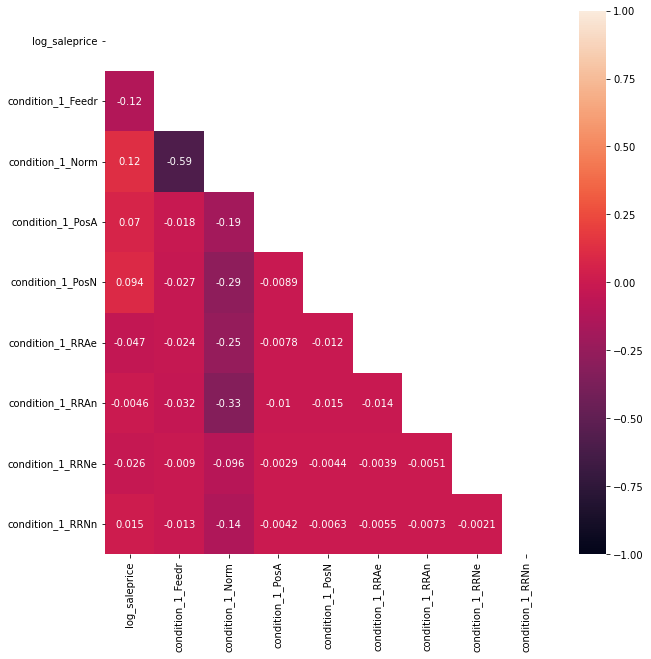

In [24]:
plt.figure(figsize = (10, 10))

corr = geog_df[['log_saleprice', 'condition_1_Feedr', 'condition_1_Norm', 'condition_1_PosA', 'condition_1_PosN', 'condition_1_RRAe', 'condition_1_RRAn', 'condition_1_RRNe', 'condition_1_RRNn']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask = mask)


Quite surprisingly, Condition 1 (which is an indicative spatial reference to transport routes and green spaces) does not have a strong influence on housing prices. Perhaps, where proximity to transport routes is concerned, being relatively closer might be a double-edged sword: while it improves one's accessibility, there is greater exposure to noise and road accidents (e.g. children running onto road). Nonetheless, we will not select any dummy features from Condition 1. 

Moving on, we will analyze Subclass, Building Type and Housing Style features together as there are overlaps: 


In [25]:
# Dummify subclass
geog_df = pd.get_dummies(data = geog_df, columns = ['ms_subclass'], drop_first = True)


In [26]:
geog_df.iloc[:5, -15:] # Dummies for subclass successfully created


,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Dummify building type
geog_df = pd.get_dummies(data = geog_df, columns = ['bldg_type'], drop_first = True)


In [28]:
geog_df.iloc[:5, -4:] # Dummies for building type successfully created


,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [29]:
# Dummify house style
geog_df = pd.get_dummies(data = geog_df, columns = ['house_style'], drop_first = True)


In [30]:
geog_df.iloc[:5, -7:] # Dummies for house style successfully created


,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0


<AxesSubplot:>

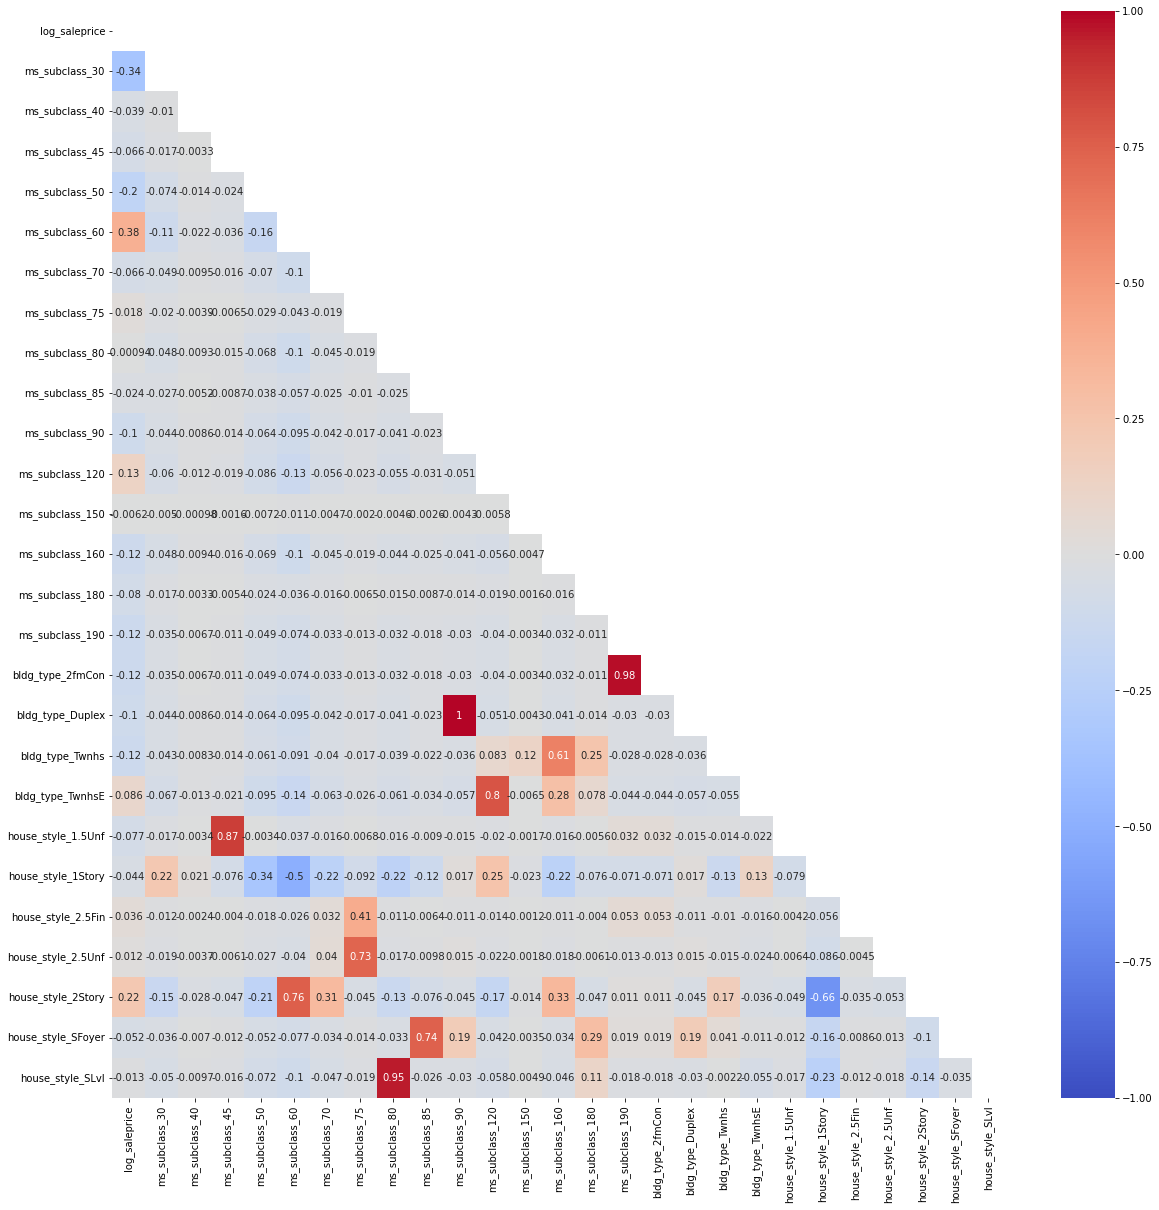

In [31]:
plt.figure(figsize = (20, 20))

corr = geog_df[['log_saleprice', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45', 'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70', 'ms_subclass_75', 'ms_subclass_80', 'ms_subclass_85', 'ms_subclass_90', 'ms_subclass_120', 'ms_subclass_150', 'ms_subclass_160', 'ms_subclass_180', 'ms_subclass_190', 'bldg_type_2fmCon', 'bldg_type_Duplex', 'bldg_type_Twnhs', 'bldg_type_TwnhsE', 'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin', 'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer','house_style_SLvl']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = mask)


In [32]:
# Baseline R2-score for ms_subclass_60 and house_style_2Story
features = ['ms_subclass_60', 'house_style_2Story']
X = geog_df[features]
y = geog_df['log_saleprice']

lr = LinearRegression()

cross_val_score(lr, X, y, cv = 5).mean()


0.14627464558474185

In [33]:
geog_df['ms_subclass_60_house_style_2Story'] = geog_df['ms_subclass_60'] * geog_df['house_style_2Story']

X = geog_df[['ms_subclass_60_house_style_2Story']]

cross_val_score(lr, X, y, cv = 5).mean()


0.13596873877304677

Just so Subclass, Building Type and Housing Style features are not completely excluded despite having low impacts on housing prices, we include an interaction term for ms_subclass_60 and house_style_2Story, both of which share a r-value of 0.76.  


<AxesSubplot:>

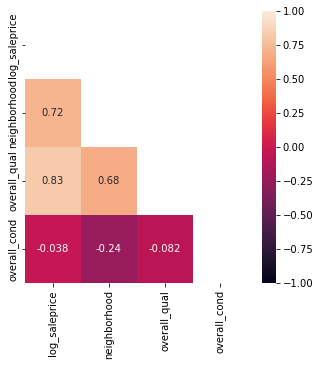

In [34]:
plt.figure(figsize = (5, 5))

corr = geog_df[['log_saleprice', 'neighborhood', 'overall_qual', 'overall_cond']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask = mask)


From the heatmap above, the earlier implemented neighbourhood scoring system returns meaningful result as shown by its high positive linear correlation with housing prices. The overall house quality has an even higher correlation with sale prices, and will definitely be included. Strangely, on the flipside, the overall house condition has a negligible effect on housing prices and as a result, will be dropped. 

In [35]:
# Creating new geography dataframe based on features selected
geog_df = geog_df[['id', 
                   'log_saleprice', 
                   'neighborhood', 
                   'overall_qual', 
                   'ms_zoning', 
                   'ms_subclass_60_house_style_2Story']]


<AxesSubplot:>

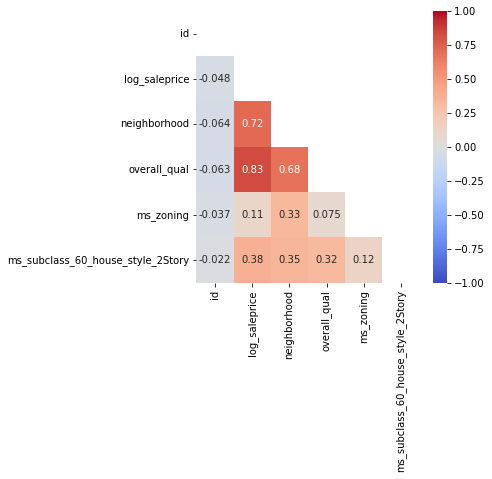

In [36]:
# Examining the remaining geographical features
plt.figure(figsize = (5, 5))

corr = geog_df.corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = mask)


While limited, geographical factors - namely neighbourhood and overall quality - have a very strong bearing on housing prices in Ames. 

In [37]:
# Drop log_saleprice from geography dataframe 
geog_df = geog_df[['id', 
                   'neighborhood', 
                   'overall_qual', 
                   'ms_zoning', 
                   'ms_subclass_60_house_style_2Story']]


<div id="2.2.2"></div>

#### 2.2.2 Parcellation


In [38]:
# Create new dataframe for parcellation category
par_df = train_clean_df[['id', 
                         'log_saleprice', 
                         'lot_area',
                         'lot_shape', 
                         'lot_config', 
                         'lot_frontage', 
                         'land_contour', 
                         'land_slope', 
                         'paved_drive']]

# Keep Id for merging


In [39]:
par_df.head() # Only a single nominal feature (lot_config) which requires dummies


,id,log_saleprice,lot_area,lot_shape,lot_config,lot_frontage,land_contour,land_slope,paved_drive
0,109,11.779129,13517,2,CulDSac,60.0,1,2,2
1,544,12.301383,11492,2,CulDSac,43.0,1,2,2
2,153,11.599103,7922,3,Inside,68.0,1,2,2
3,318,12.066811,9802,3,Inside,73.0,1,2,2
4,255,11.838626,14235,2,Inside,82.0,1,2,0


In [40]:
par_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2047 non-null   int64  
 1   log_saleprice  2047 non-null   float64
 2   lot_area       2047 non-null   int64  
 3   lot_shape      2047 non-null   int64  
 4   lot_config     2047 non-null   object 
 5   lot_frontage   2047 non-null   float64
 6   land_contour   2047 non-null   int64  
 7   land_slope     2047 non-null   int64  
 8   paved_drive    2047 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 144.1+ KB


In [41]:
# Dummify lot configuration
par_df = pd.get_dummies(data = par_df, columns = ['lot_config'], drop_first = True)


In [42]:
par_df.iloc[:5, -4:] # Dummies for lot configuration successfully created


,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside
0,1,0,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


<AxesSubplot:>

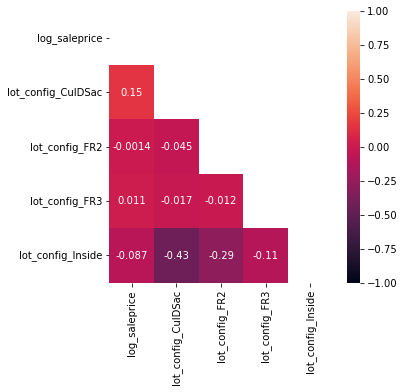

In [43]:
plt.figure(figsize = (5, 5))

corr = par_df[['log_saleprice', 'lot_config_CulDSac', 'lot_config_FR2', 'lot_config_FR3', 'lot_config_Inside']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask = mask)


Another interesting find that the Lot configuration does not have a strong influence on housing prices. Based on anecdotal knowledge, houses with less frontage and away from roads/paths command a higher premium due to more privacy. Regardless, dummy features for Lot configuration will not be selected. 


<AxesSubplot:>

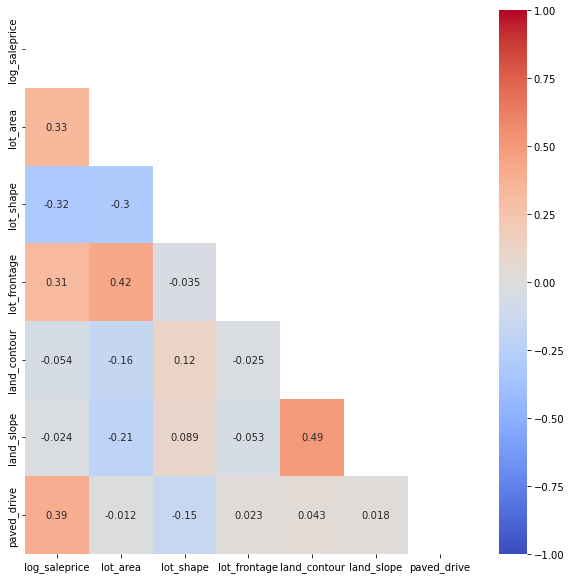

In [44]:
plt.figure(figsize = (10, 10))

corr = par_df[['log_saleprice', 'lot_area', 'lot_shape', 'lot_frontage', 'land_contour', 'land_slope', 'paved_drive']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = mask)


For the other parcellation factors, they can generally be grouped into lot related (Lot area, Lot shape, Lot frontage, Paved driveway) and platform level related (Land contour, Land slope). 

In [45]:
features = ['lot_area', 'lot_shape', 'lot_frontage', 'paved_drive']
X = par_df[features]
y = par_df['log_saleprice']

lr = LinearRegression()

cross_val_score(lr, X, y, cv = 5).mean()


0.3302643273301784

In [46]:
par_df['overall_lot'] = par_df['lot_area'] * par_df['lot_shape'] * par_df['lot_frontage'] * par_df['paved_drive']

features.append('overall_lot')
X = par_df[features]

cross_val_score(lr, X, y, cv = 5).mean()


0.3411914104701993

Initially, the intention was to study if adding an interaction term would improve results given suspected collinearities between lot related features. However, as the R2-score is lower, the interaction term is not meaningful. Instead, we will include the original lot features despite having low-moderate positive correlation to housing sale prices. From my domain knowledge, these are considered as critical factors for development. As an example, it would not be meaningful to look at lot area in isolation without taking lot shape into account; a plot of land can be large in terms of space but an irregular elongated parcellation would limt the buildable space and by extension, value of the subject land plot. 


In [47]:
features = ['land_contour', 'land_slope']
X = par_df[features]
y = par_df['log_saleprice']

lr = LinearRegression()

cross_val_score(lr, X, y, cv = 5).mean()


-0.003248867747918838

In [48]:
par_df['land_contour_land_slope'] = par_df['land_contour'] * par_df['land_slope']

features.append('land_contour_land_slope')
X = par_df[features]

cross_val_score(lr, X, y, cv = 5).mean()


-0.0047232292018877685

The result on Land Contour and Land slope in relation to sale price also caught me by surprise as I was expecting a stronger result. Land plots with large variations in platform levels would either render the buildable space limited or result in higher cost arising from the need to level the land before construction. Still, we will drop both features as the r-value is way too small. 

In [49]:
# Creating new parcellation dataframe based on features selected
par_df = par_df[['id', 
                 'log_saleprice', 
                 'lot_area', 
                 'lot_shape', 
                 'lot_frontage', 
                 'paved_drive']]


<AxesSubplot:>

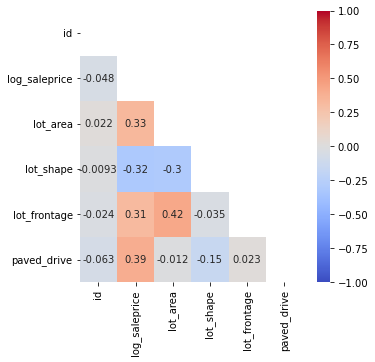

In [50]:
# Examining the remaining parcellation features
plt.figure(figsize = (5, 5))

corr = par_df.corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = mask)


Quite frankly, the finalized parcellation features are not the most promising, but we have been assessed to be the best of the lot (no pun intended). 


In [51]:
# Drop log_saleprice from parcellation dataframe and add Id in for merging
par_df = par_df[['id', 
                 'lot_area', 
                 'lot_shape', 
                 'lot_frontage', 
                 'paved_drive']]


<div id="2.2.3"></div>

#### 2.2.3 Internal Built Environment


In [52]:
# Create new dataframe for internal built environment category
ibe_df = train_clean_df[['id', 
                         'log_saleprice', 
                         'gr_liv_area', 
                         '1st_flr_sf', 
                         '2nd_flr_sf', 
                         'low_qual_fin_sf', 
                         'totrms_abvgrd', 
                         'bedroom_abvgr', 
                         'kitchen_abvgr', 
                         'kitchen_qual', 
                         'full_bath', 
                         'half_bath', 
                         'fireplaces', 
                         'fireplace_qu', 
                         'total_bsmt_sf', 
                         'bsmtfin_sf_1', 
                         'bsmtfin_sf_2', 
                         'bsmt_unf_sf', 
                         'bsmt_qual', 
                         'bsmt_cond', 
                         'bsmt_exposure', 
                         'bsmtfin_type_1', 
                         'bsmtfin_type_2', 
                         'bsmt_full_bath', 
                         'bsmt_half_bath']]

# Keep Id for merging


In [53]:
ibe_df.head() # No nominal features which requires dummifying


,id,log_saleprice,gr_liv_area,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,totrms_abvgrd,bedroom_abvgr,kitchen_abvgr,kitchen_qual,full_bath,half_bath,fireplaces,fireplace_qu,total_bsmt_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmt_full_bath,bsmt_half_bath
0,109,11.779129,1479,725,754,0,6,3,1,3,2,1,0,0,725.0,533.0,0.0,192.0,3,3,1,6,1,0,0
1,544,12.301383,2122,913,1209,0,8,4,1,3,2,1,1,3,913.0,637.0,0.0,276.0,4,3,1,6,1,1,0
2,153,11.599103,1057,1057,0,0,5,3,1,3,1,0,0,0,1057.0,731.0,0.0,326.0,3,3,1,6,1,1,0
3,318,12.066811,1444,744,700,0,7,3,1,2,2,1,0,0,384.0,0.0,0.0,384.0,4,3,1,1,1,0,0
4,255,11.838626,1445,831,614,0,6,3,1,2,2,0,0,0,676.0,0.0,0.0,676.0,2,4,1,1,1,0,0


In [54]:
ibe_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2047 non-null   int64  
 1   log_saleprice    2047 non-null   float64
 2   gr_liv_area      2047 non-null   int64  
 3   1st_flr_sf       2047 non-null   int64  
 4   2nd_flr_sf       2047 non-null   int64  
 5   low_qual_fin_sf  2047 non-null   int64  
 6   totrms_abvgrd    2047 non-null   int64  
 7   bedroom_abvgr    2047 non-null   int64  
 8   kitchen_abvgr    2047 non-null   int64  
 9   kitchen_qual     2047 non-null   int64  
 10  full_bath        2047 non-null   int64  
 11  half_bath        2047 non-null   int64  
 12  fireplaces       2047 non-null   int64  
 13  fireplace_qu     2047 non-null   int64  
 14  total_bsmt_sf    2047 non-null   float64
 15  bsmtfin_sf_1     2047 non-null   float64
 16  bsmtfin_sf_2     2047 non-null   float64
 17  bsmt_unf_sf   

<AxesSubplot:>

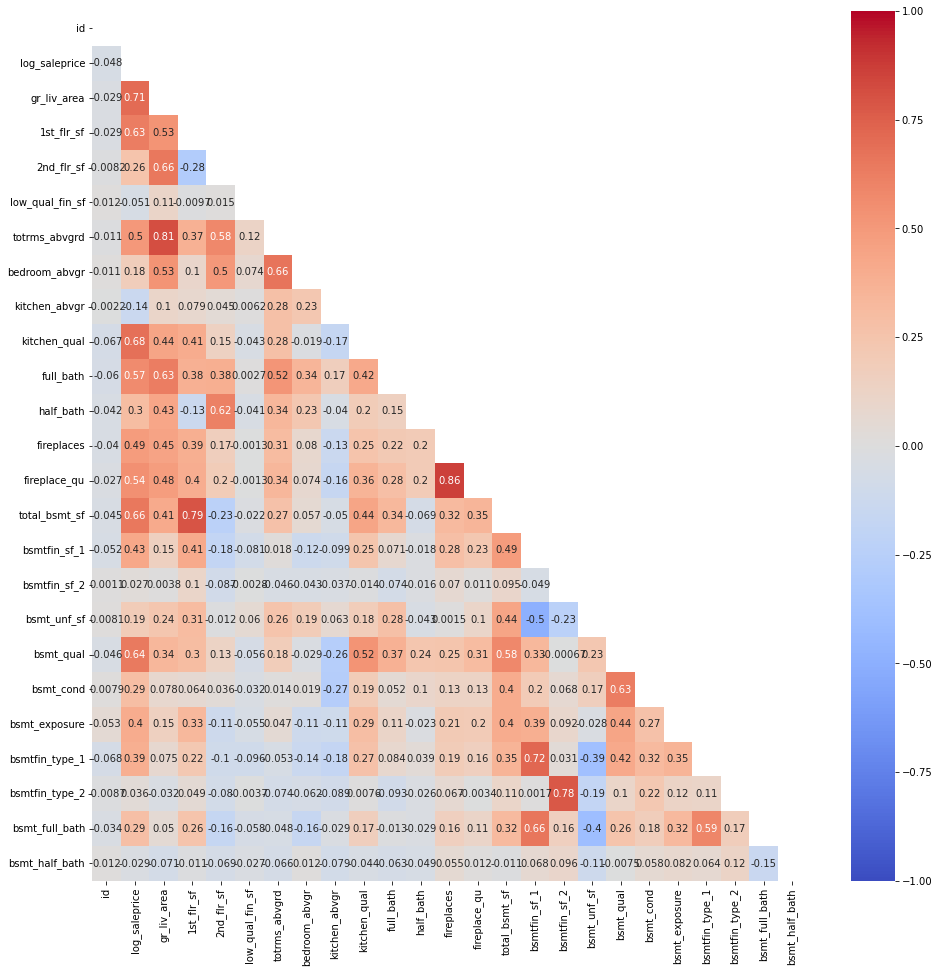

In [55]:
plt.figure(figsize = (16, 16))

corr = ibe_df.corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = mask)


To control the number of features in the model, the internal built environment features is streamlined into the following groups: 
- Total above grade area
- Total number of above grade rooms
- Total number of bathrooms (both above grade and below grade)
- Total below grade area (i.e. basement)
- Overall basement score

In [56]:
# Create single feature for above grade area
ibe_df['abv_grd_sf'] = ibe_df['1st_flr_sf'] + ibe_df['2nd_flr_sf']

# low quality finished sf excluded given the extremely weak correlation to log sale price


/var/folders/z_/j3yc64qs4rb8q0x2nzz22pq80000gn/T/ipykernel_9459/4007610597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibe_df['abv_grd_sf'] = ibe_df['1st_flr_sf'] + ibe_df['2nd_flr_sf']


/var/folders/z_/j3yc64qs4rb8q0x2nzz22pq80000gn/T/ipykernel_9459/916987071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibe_df['abv_grd_rms'] = ibe_df['totrms_abvgrd'] + ibe_df['bedroom_abvgr'] + ibe_df['kitchen_abvgr']


<AxesSubplot:>

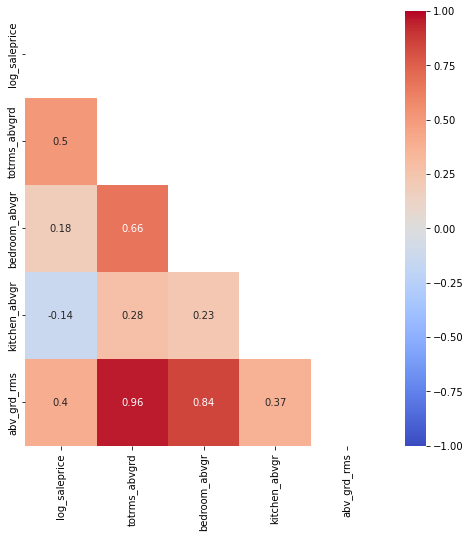

In [57]:
# Checking best approach to engineer feature for above grade room count
ibe_df['abv_grd_rms'] = ibe_df['totrms_abvgrd'] + ibe_df['bedroom_abvgr'] + ibe_df['kitchen_abvgr']

plt.figure(figsize = (8, 8))

corr = ibe_df[['log_saleprice', 'totrms_abvgrd', 'bedroom_abvgr', 'kitchen_abvgr', 'abv_grd_rms']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = mask)


At a glance, the number of bedrooms and kitchens do not have a strong effect on sale price. This is slightly surprising for bedroom count; given that Ames is a univeresity city, one would imagine that a house with more bedrooms will command a higher price as there is higher possibility of renting out for income. We also observe that creating a new aggregate feature does not yield a better outcome since its r-value of 0.4 is lower than r-value of 0.5 for total above grade rooms. Hence, we will only include total above grade rooms and drop the other features. 


In [58]:
# Create single feature for total bathrooms count 
ibe_df['total_bath'] = ibe_df['full_bath'] + ibe_df['half_bath'] + ibe_df['bsmt_full_bath'] + ibe_df['bsmt_half_bath']


/var/folders/z_/j3yc64qs4rb8q0x2nzz22pq80000gn/T/ipykernel_9459/3751834244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibe_df['total_bath'] = ibe_df['full_bath'] + ibe_df['half_bath'] + ibe_df['bsmt_full_bath'] + ibe_df['bsmt_half_bath']


In [59]:
# Create single feature for below grade area
ibe_df['below_grd_sf'] = ibe_df['total_bsmt_sf'] + ibe_df['bsmtfin_sf_1']

# bsmtfin_sf_2 and bsmt_unf_sf excluded given their extremely weak correlation to log sale price


/var/folders/z_/j3yc64qs4rb8q0x2nzz22pq80000gn/T/ipykernel_9459/2248063325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibe_df['below_grd_sf'] = ibe_df['total_bsmt_sf'] + ibe_df['bsmtfin_sf_1']


In [60]:
# Create single feature for overall basement score
ibe_df['overall_bsmt_score'] = ibe_df['bsmt_qual'] + ibe_df['bsmt_exposure'] + ibe_df['bsmtfin_type_1']

# bsmt_cond and bsmtfin_type_2 excluded given their weak correlation to log sale price


/var/folders/z_/j3yc64qs4rb8q0x2nzz22pq80000gn/T/ipykernel_9459/2003992509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibe_df['overall_bsmt_score'] = ibe_df['bsmt_qual'] + ibe_df['bsmt_exposure'] + ibe_df['bsmtfin_type_1']


In [61]:
ibe_df.head() # Check total columns before dropping


,id,log_saleprice,gr_liv_area,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,totrms_abvgrd,bedroom_abvgr,kitchen_abvgr,kitchen_qual,full_bath,half_bath,fireplaces,fireplace_qu,total_bsmt_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmt_full_bath,bsmt_half_bath,abv_grd_sf,abv_grd_rms,total_bath,below_grd_sf,overall_bsmt_score
0,109,11.779129,1479,725,754,0,6,3,1,3,2,1,0,0,725.0,533.0,0.0,192.0,3,3,1,6,1,0,0,1479,10,3,1258.0,10
1,544,12.301383,2122,913,1209,0,8,4,1,3,2,1,1,3,913.0,637.0,0.0,276.0,4,3,1,6,1,1,0,2122,13,4,1550.0,11
2,153,11.599103,1057,1057,0,0,5,3,1,3,1,0,0,0,1057.0,731.0,0.0,326.0,3,3,1,6,1,1,0,1057,9,2,1788.0,10
3,318,12.066811,1444,744,700,0,7,3,1,2,2,1,0,0,384.0,0.0,0.0,384.0,4,3,1,1,1,0,0,1444,11,3,384.0,6
4,255,11.838626,1445,831,614,0,6,3,1,2,2,0,0,0,676.0,0.0,0.0,676.0,2,4,1,1,1,0,0,1445,10,2,676.0,4


In [62]:
# Creating new internal built environment dataframe based on features selected
ibe_df = ibe_df.drop(columns = ['1st_flr_sf', 
                                '2nd_flr_sf', 
                                'low_qual_fin_sf', 
                                'abv_grd_rms', 
                                'bedroom_abvgr', 
                                'kitchen_abvgr',  
                                'full_bath', 
                                'half_bath', 
                                'bsmt_full_bath', 
                                'bsmt_half_bath', 
                                'total_bsmt_sf', 
                                'bsmtfin_sf_1',
                                'bsmtfin_sf_2', 
                                'bsmt_unf_sf', 
                                'bsmt_qual', 
                                'bsmt_cond', 
                                'bsmt_exposure', 
                                'bsmtfin_type_1', 
                                'bsmtfin_type_2'])
                           

In [63]:
ibe_df.head() # Check remaining columns are correct


,id,log_saleprice,gr_liv_area,totrms_abvgrd,kitchen_qual,fireplaces,fireplace_qu,abv_grd_sf,total_bath,below_grd_sf,overall_bsmt_score
0,109,11.779129,1479,6,3,0,0,1479,3,1258.0,10
1,544,12.301383,2122,8,3,1,3,2122,4,1550.0,11
2,153,11.599103,1057,5,3,0,0,1057,2,1788.0,10
3,318,12.066811,1444,7,2,0,0,1444,3,384.0,6
4,255,11.838626,1445,6,2,0,0,1445,2,676.0,4


<AxesSubplot:>

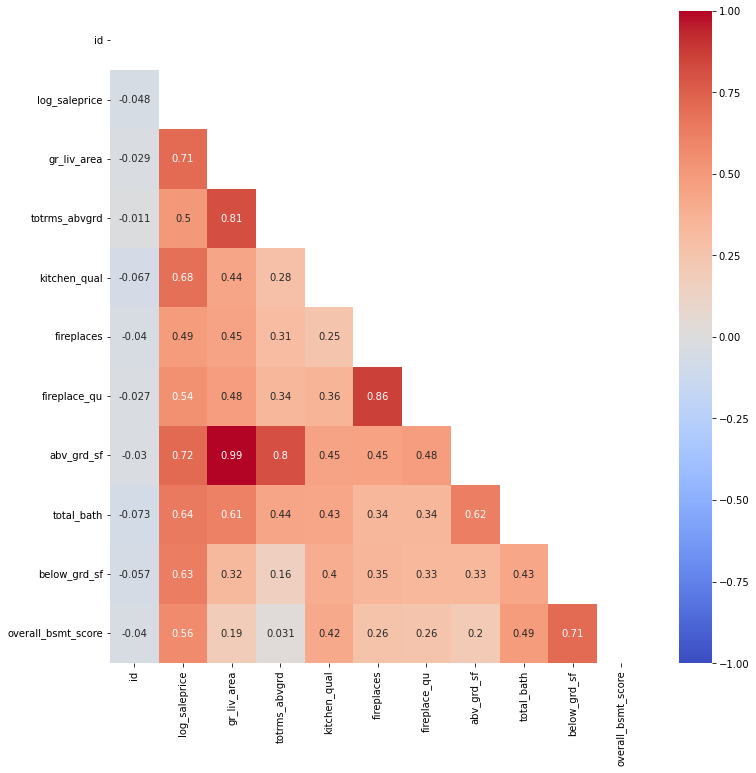

In [64]:
# Reconstruct heatmap for assessment
plt.figure(figsize = (12, 12))

corr = ibe_df.corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = mask)


The internal built environment features selected generally look positive, with most in the range of 0.5 to 0.75 for r-values in relation to housing prices. The r-value of 0.99 between Above grade area and Gross living area stand out in particular, signalling to an extremely high intercorrelation between both variables. If the eventual model requires further fine tuning, we may consider dropping one of these two features. 


In [65]:
# Drop log_saleprice from internal built environment dataframe
ibe_df = ibe_df.drop(columns = ['log_saleprice'])


<div id="2.2.4"></div>

#### 2.2.4 External Built Environment


In [66]:
# Create new dataframe for external built environment category
ebe_df = train_clean_df[['id', 
                         'log_saleprice', 
                         'exter_qual',
                         'exter_cond', 
                         'foundation', 
                         'garage_area', 
                         'garage_cars', 
                         'garage_type', 
                         'garage_qual', 
                         'garage_cond', 
                         'garage_finish', 
                         'roof_style', 
                         'exterior_1st', 
                         'exterior_2nd', 
                         'mas_vnr_area', 
                         'mas_vnr_type', 
                         'wood_deck_sf', 
                         'open_porch_sf', 
                         'enclosed_porch', 
                         '3ssn_porch', 
                         'screen_porch', 
                         'pool_area']]

# Keep Id for merging


In [67]:
ebe_df.head() # Quite a number of features which require dummies; they will be addressed first. 


,id,log_saleprice,exter_qual,exter_cond,foundation,garage_area,garage_cars,garage_type,garage_qual,garage_cond,garage_finish,roof_style,exterior_1st,exterior_2nd,mas_vnr_area,mas_vnr_type,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area
0,109,11.779129,3,2,CBlock,475.0,2,Attchd,3,3,2,Gable,HdBoard,Plywood,289.0,BrkFace,0,44,0,0,0,0
1,544,12.301383,3,2,PConc,559.0,2,Attchd,3,3,2,Gable,VinylSd,VinylSd,132.0,BrkFace,0,74,0,0,0,0
2,153,11.599103,2,3,CBlock,246.0,1,Detchd,3,3,1,Gable,VinylSd,VinylSd,0.0,None,0,52,0,0,0,0
3,318,12.066811,2,2,PConc,400.0,2,BuiltIn,3,3,3,Gable,VinylSd,VinylSd,0.0,None,100,0,0,0,0,0
4,255,11.838626,2,2,PConc,484.0,2,Detchd,3,3,1,Gable,Wd Sdng,Plywood,0.0,None,0,59,0,0,0,0


In [68]:
ebe_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2047 non-null   int64  
 1   log_saleprice   2047 non-null   float64
 2   exter_qual      2047 non-null   int64  
 3   exter_cond      2047 non-null   int64  
 4   foundation      2047 non-null   object 
 5   garage_area     2047 non-null   float64
 6   garage_cars     2047 non-null   int64  
 7   garage_type     1934 non-null   object 
 8   garage_qual     2047 non-null   int64  
 9   garage_cond     2047 non-null   int64  
 10  garage_finish   2047 non-null   int64  
 11  roof_style      2047 non-null   object 
 12  exterior_1st    2047 non-null   object 
 13  exterior_2nd    2047 non-null   object 
 14  mas_vnr_area    2047 non-null   float64
 15  mas_vnr_type    2047 non-null   object 
 16  wood_deck_sf    2047 non-null   int64  
 17  open_porch_sf   2047 non-null   i

In [69]:
# Dummify foundation
ebe_df = pd.get_dummies(data = ebe_df, columns = ['foundation'], drop_first = True)


In [70]:
ebe_df.iloc[:5, -5:] # Dummies for foundation successfully created


,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


<AxesSubplot:>

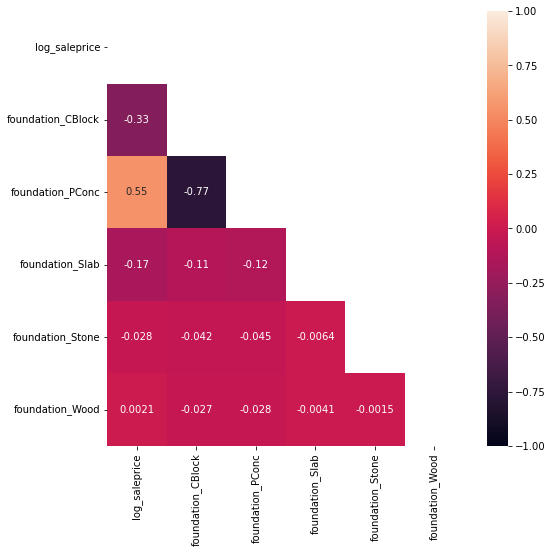

In [71]:
plt.figure(figsize = (8, 8))

corr = ebe_df[['log_saleprice', 'foundation_CBlock', 'foundation_PConc', 'foundation_Slab', 'foundation_Stone', 'foundation_Wood']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask = mask)


Poured concrete foundation is the only dummy feature worth considering and will be included. A reasonable guess would be that poured concrete is perceived to be the most stable housing foundation and hence, are valued in the eyes of buyers. 


In [72]:
# Dummify garage type
ebe_df = pd.get_dummies(data = ebe_df, columns = ['garage_type'], drop_first = True)


In [73]:
ebe_df.iloc[:5, -5:] # Dummies for garage type successfully created


,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,0,1


<AxesSubplot:>

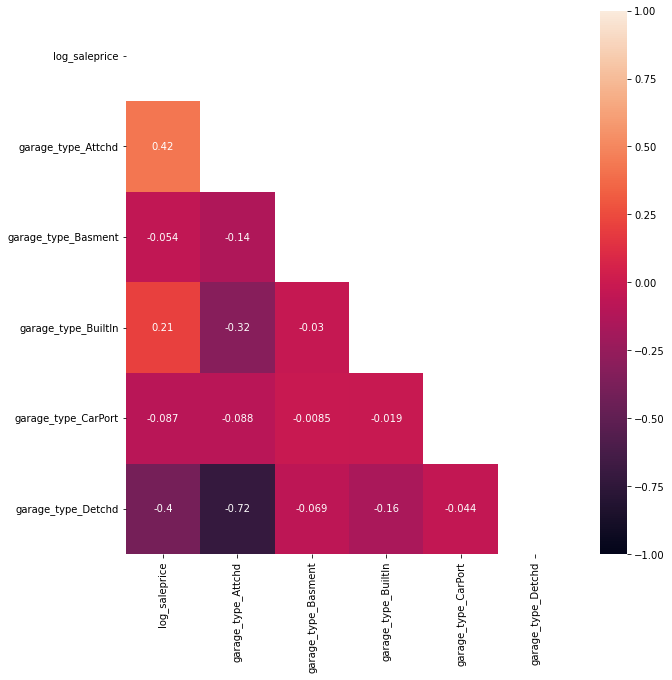

In [74]:
plt.figure(figsize = (10, 10))

corr = ebe_df[['log_saleprice', 'garage_type_Attchd', 'garage_type_Basment', 'garage_type_BuiltIn', 'garage_type_CarPort', 'garage_type_Detchd']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask = mask)


Attached and detached garages are favoured among the garge types, and will be included in the model. 


In [75]:
# Dummify roof style
ebe_df = pd.get_dummies(data = ebe_df, columns = ['roof_style'], drop_first = True)


In [76]:
ebe_df.iloc[:5, -5:] # Dummies for condition 1 successfully created


,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


<AxesSubplot:>

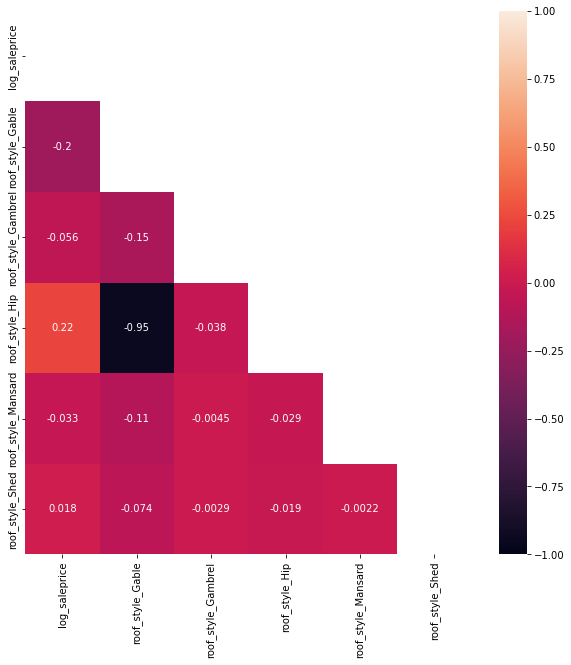

In [77]:
plt.figure(figsize = (10, 10))

corr = ebe_df[['log_saleprice', 'roof_style_Gable', 'roof_style_Gambrel', 'roof_style_Hip', 'roof_style_Mansard', 'roof_style_Shed']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask = mask)


While the scores for roof styles are not inspiring, we will include the Hip roof style purely for coverage. 


In [78]:
# Dummify Exterior 1st
ebe_df = pd.get_dummies(data = ebe_df, columns = ['exterior_1st'], drop_first = True)


In [79]:
ebe_df.iloc[:5, -14:] # Dummies for Exterior 1st successfully created


,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

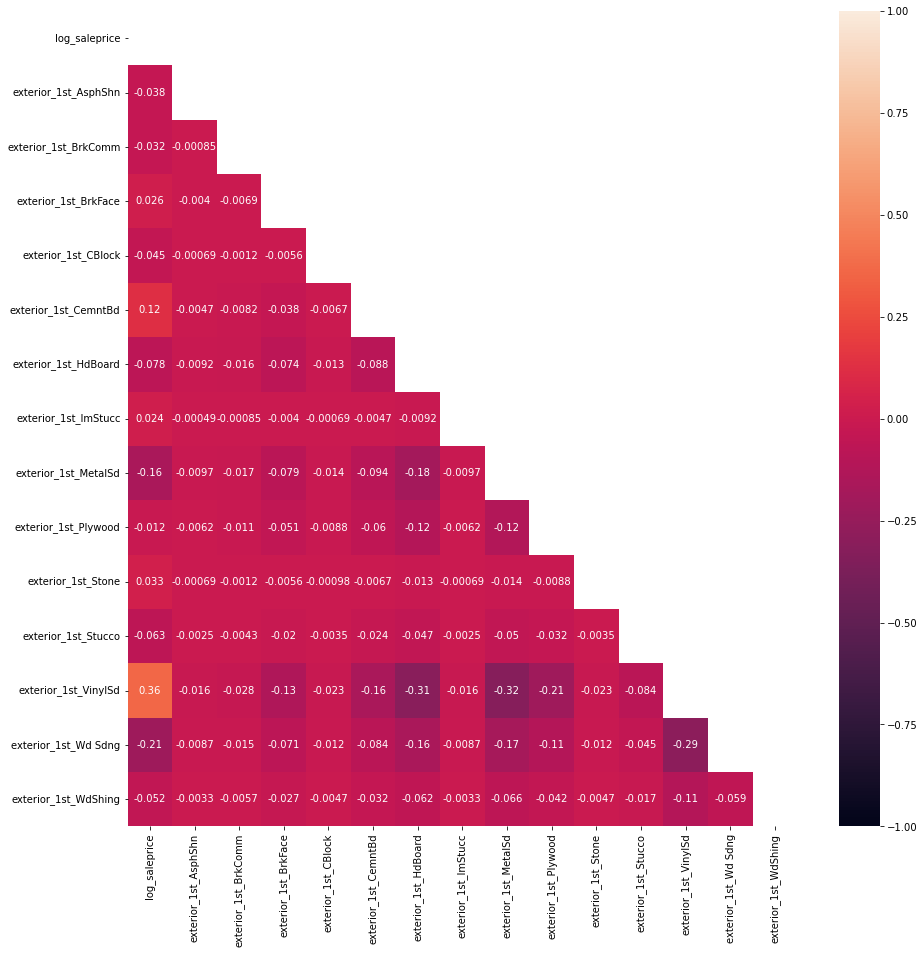

In [80]:
plt.figure(figsize = (15, 15))

corr = ebe_df[['log_saleprice', 'exterior_1st_AsphShn', 'exterior_1st_BrkComm', 'exterior_1st_BrkFace', 'exterior_1st_CBlock', 'exterior_1st_CemntBd', 'exterior_1st_HdBoard', 'exterior_1st_ImStucc', 'exterior_1st_MetalSd', 'exterior_1st_Plywood', 'exterior_1st_Stone', 'exterior_1st_Stucco', 'exterior_1st_VinylSd', 'exterior_1st_Wd Sdng', 'exterior_1st_WdShing']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask = mask)


1st VinylSd will be tentatively included given its moderate positive correlation to sale price. 

In [81]:
# Dummify Exterior 2nd
ebe_df = pd.get_dummies(data = ebe_df, columns = ['exterior_2nd'], drop_first = True)


In [82]:
ebe_df.iloc[:5, -14:] # Dummies for Exterior 2nd successfully created


,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

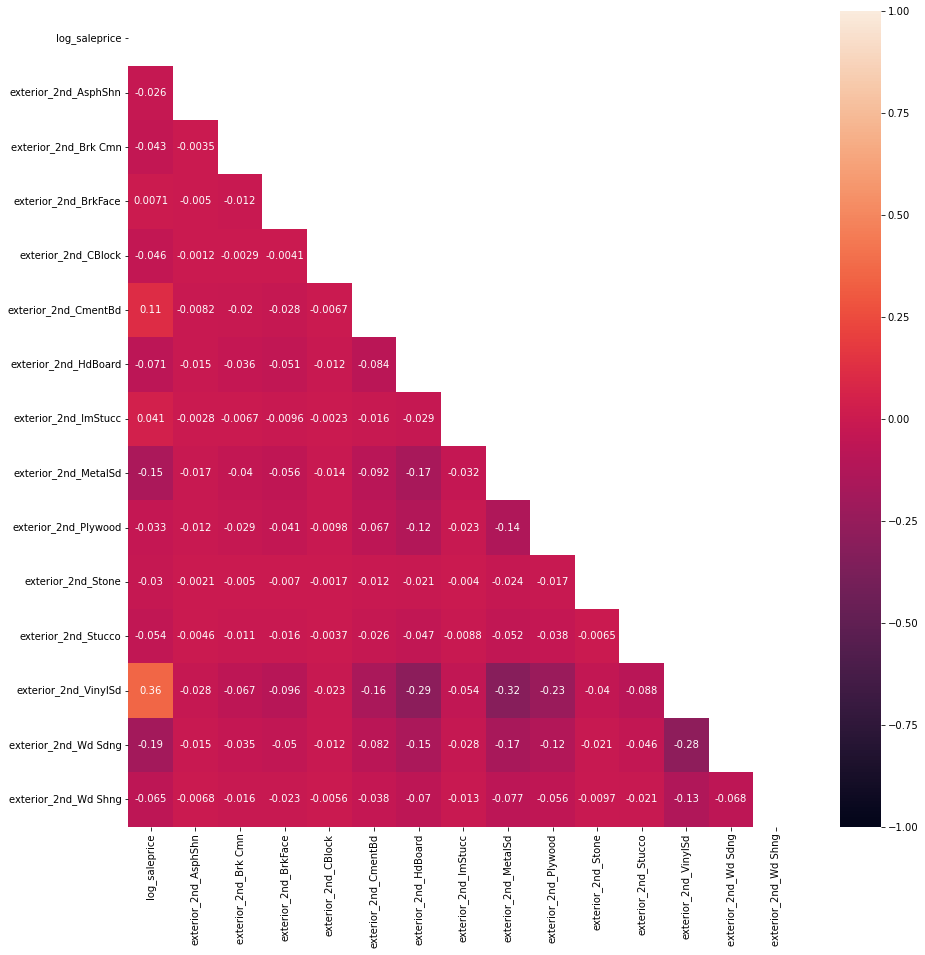

In [83]:
plt.figure(figsize = (15, 15))

corr = ebe_df[['log_saleprice', 'exterior_2nd_AsphShn', 'exterior_2nd_Brk Cmn', 'exterior_2nd_BrkFace', 'exterior_2nd_CBlock', 'exterior_2nd_CmentBd', 'exterior_2nd_HdBoard', 'exterior_2nd_ImStucc', 'exterior_2nd_MetalSd', 'exterior_2nd_Plywood', 'exterior_2nd_Stone', 'exterior_2nd_Stucco', 'exterior_2nd_VinylSd', 'exterior_2nd_Wd Sdng', 'exterior_2nd_Wd Shng']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask = mask)


Likewise, 2nd VinylSd will be tentatively included given its moderate positive correlation to sale price. 


In [84]:
# Dummify masonry veneer type
ebe_df = pd.get_dummies(data = ebe_df, columns = ['mas_vnr_type'], drop_first = True)


In [85]:
ebe_df.iloc[:5, -4:] # Dummies for masonry veneer type successfully created


,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


<AxesSubplot:>

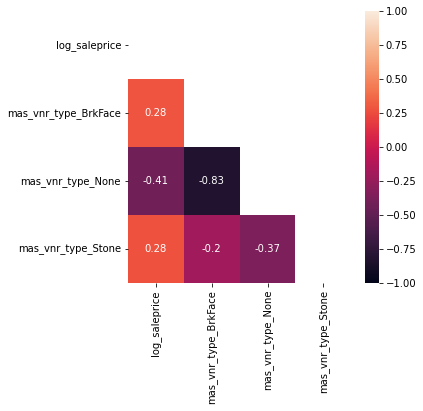

In [86]:
plt.figure(figsize = (5, 5))

corr = ebe_df[['log_saleprice', 'mas_vnr_type_BrkFace', 'mas_vnr_type_None', 'mas_vnr_type_Stone']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask = mask)


The heatmap seems to suggest that houses without any masonry veneer types are prized over others. At this juncture, we will included the dummy feature for None masonry veneer. 


<AxesSubplot:>

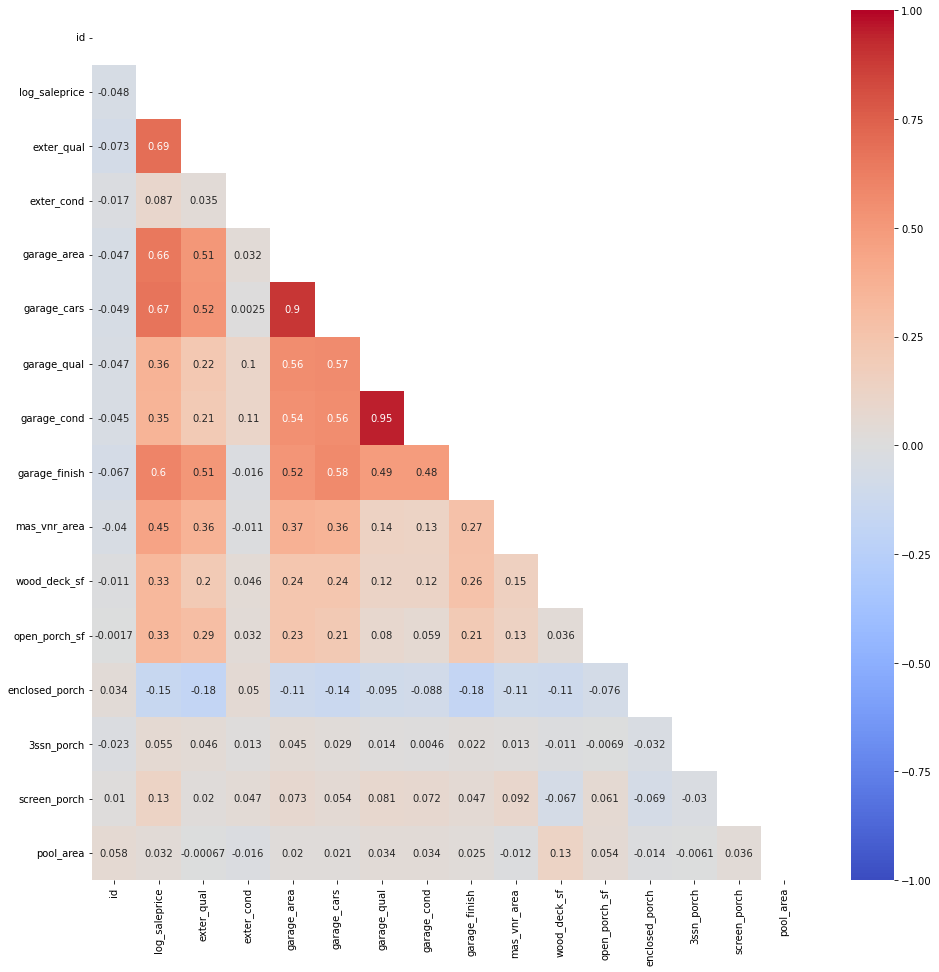

In [87]:
plt.figure(figsize = (16, 16))

corr = ebe_df[['id', 
               'log_saleprice', 
                    'exter_qual',
                    'exter_cond', 
                    'garage_area', 
                    'garage_cars', 
                    'garage_qual', 
                    'garage_cond', 
                    'garage_finish', 
                    'mas_vnr_area', 
                    'wood_deck_sf', 
                    'open_porch_sf', 
                    'enclosed_porch', 
                    '3ssn_porch', 
                    'screen_porch', 
                    'pool_area']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = mask)


In [88]:
# Create single feature for outdoore area
ebe_df['total_outdoor_area'] = ebe_df['garage_area'] + ebe_df['mas_vnr_area'] + ebe_df['wood_deck_sf'] + ebe_df['open_porch_sf'] + ebe_df['enclosed_porch'] + ebe_df['3ssn_porch'] + ebe_df['screen_porch']


In [89]:
# Create single feature for overall garage score
ebe_df['overall_garage_score'] = ebe_df['garage_qual'] + ebe_df['garage_cond'] + ebe_df['garage_finish']


In [90]:
ebe_df = ebe_df[['id', 
                 'log_saleprice', 
                 'exter_qual', 
                 'total_outdoor_area', 
                 'garage_cars', 
                 'overall_garage_score', 
                 'foundation_PConc', 
                 'garage_type_Attchd',
                 'garage_type_Detchd', 
                 'roof_style_Hip', 
                 'exterior_1st_VinylSd', 
                 'exterior_2nd_VinylSd', 
                 'mas_vnr_type_None']]


<AxesSubplot:>

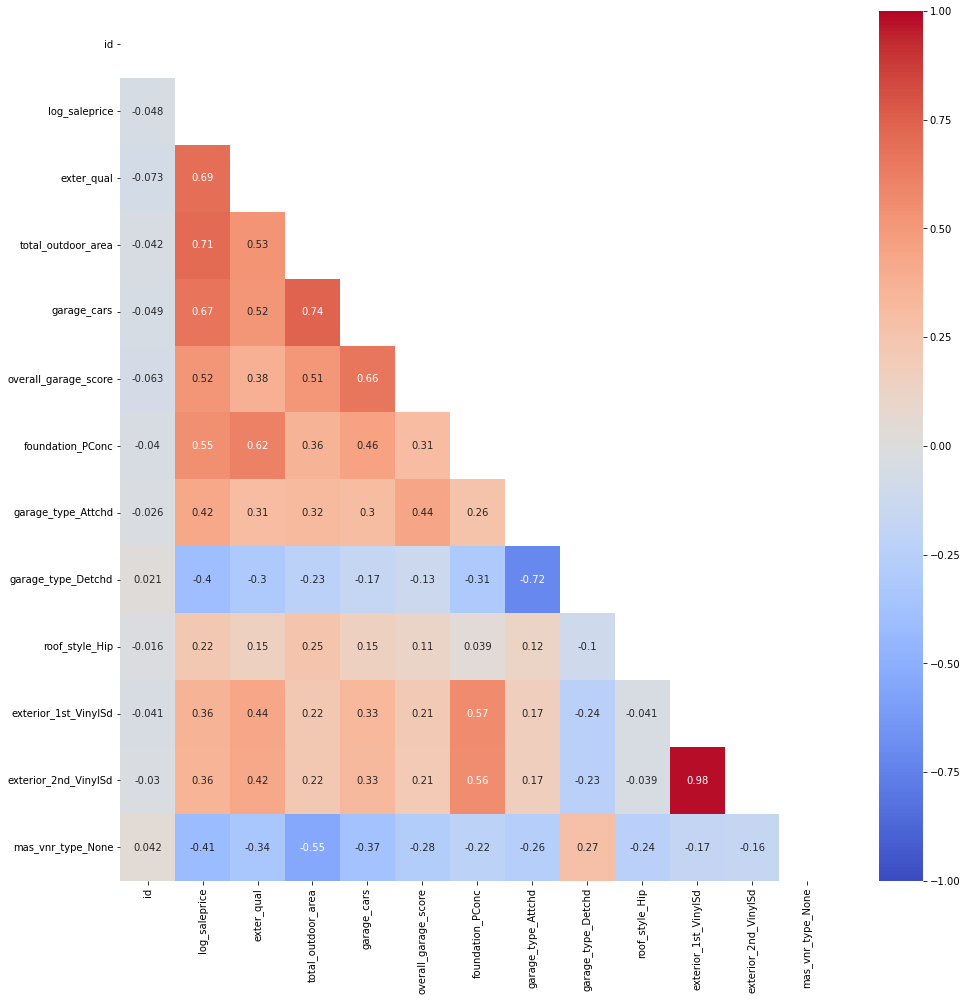

In [91]:
plt.figure(figsize = (16, 16))

corr = ebe_df.corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = mask)


As Exterior 1st VinylSd and Exterior 2nd VinylSd has close to perfect positive linear correlation, we drop the latter to reduce multicollinearity. 


In [92]:
# Concurrently drop log_saleprice as well
ebe_df = ebe_df[['id', 
                 'exter_qual', 
                 'total_outdoor_area', 
                 'garage_cars', 
                 'overall_garage_score', 
                 'foundation_PConc', 
                 'garage_type_Attchd',
                 'garage_type_Detchd', 
                 'roof_style_Hip', 
                 'exterior_1st_VinylSd', 
                 'mas_vnr_type_None']]


In [93]:
ebe_df.head()


,id,exter_qual,total_outdoor_area,garage_cars,overall_garage_score,foundation_PConc,garage_type_Attchd,garage_type_Detchd,roof_style_Hip,exterior_1st_VinylSd,mas_vnr_type_None
0,109,3,808.0,2,8,0,1,0,0,0,0
1,544,3,765.0,2,8,1,1,0,0,1,0
2,153,2,298.0,1,7,0,0,1,0,1,1
3,318,2,500.0,2,9,1,0,0,0,1,1
4,255,2,543.0,2,7,1,0,1,0,0,1


Overall for external built environment, we have several promising features such as exterior quailty, total outdoor area and garage score, which have scores in the range of 0.5 to 0.7. 


<div id="2.2.5"></div>

#### 2.2.5 Miscellaneous


In [94]:
# Create new dataframe for miscellaneous category (ID excluded as it is only a unique identifier)
misc_df = train_clean_df[['id', 
                          'log_saleprice',
                          'year_built', 
                          'year_remod/add', 
                          'yr_sold', 
                          'mo_sold', 
                          'utilities', 
                          'heating_qc', 
                          'electrical', 
                          'functional', 
                          'misc_val', 
                          'sale_type']]

# Keep Id for merging


In [95]:
misc_df.head()


,id,log_saleprice,year_built,year_remod/add,yr_sold,mo_sold,utilities,heating_qc,electrical,functional,misc_val,sale_type
0,109,11.779129,1976,2005,2010,3,3,2,4,7,0,WD
1,544,12.301383,1996,1997,2009,4,3,2,4,7,0,WD
2,153,11.599103,1953,2007,2010,1,3,3,4,7,0,WD
3,318,12.066811,2006,2007,2010,4,3,2,4,7,0,WD
4,255,11.838626,1900,1993,2010,3,3,2,4,7,0,WD


In [96]:
misc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2047 non-null   int64  
 1   log_saleprice   2047 non-null   float64
 2   year_built      2047 non-null   int64  
 3   year_remod/add  2047 non-null   int64  
 4   yr_sold         2047 non-null   int64  
 5   mo_sold         2047 non-null   int64  
 6   utilities       2047 non-null   int64  
 7   heating_qc      2047 non-null   int64  
 8   electrical      2047 non-null   int64  
 9   functional      2047 non-null   int64  
 10  misc_val        2047 non-null   int64  
 11  sale_type       2047 non-null   object 
dtypes: float64(1), int64(10), object(1)
memory usage: 192.0+ KB


In [97]:
# Dummify sale type
misc_df = pd.get_dummies(data = misc_df, columns = ['sale_type'], drop_first = True)


In [98]:
misc_df.iloc[:5, -8:] # Dummies for sale type successfully created


,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


<AxesSubplot:>

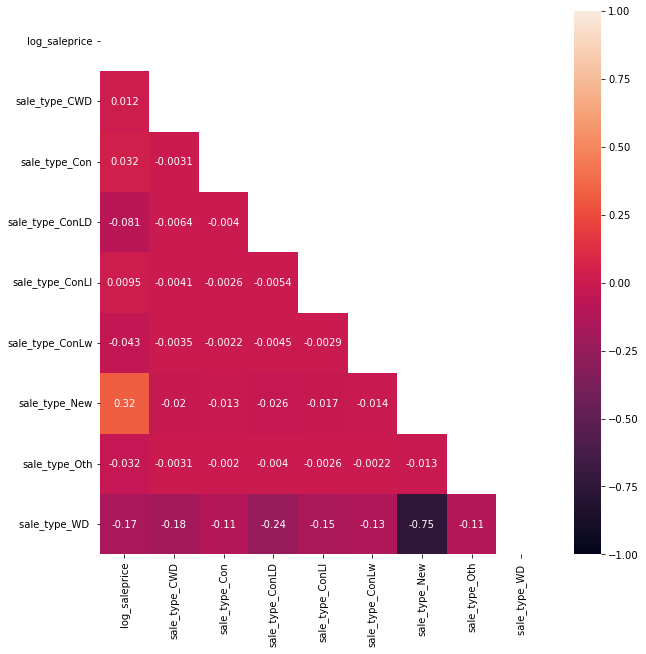

In [99]:
plt.figure(figsize = (10, 10))

corr = misc_df[['log_saleprice', 'sale_type_CWD', 'sale_type_Con', 'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth', 'sale_type_WD ']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask = mask)


From the heatmap, only sale_type_New is worth including in our model.  

Next, we collapse the built year, remod/A&A year and year sold into a single feature indicating the age of the house. We first check that remod/A&A year is minimally equal to built year, since according to the data description, it will be the same as construction date if no remodeling or A&A were done. 

In [100]:
(misc_df['year_remod/add'] >= misc_df['year_built']).value_counts() 


True     2046
False       1
dtype: int64

All except a single house conforms to the logic for built year and remod/A&A year. We investigate this house further: 

In [101]:
misc_df[(misc_df['year_built'] > misc_df['year_remod/add'])]


,id,log_saleprice,year_built,year_remod/add,yr_sold,mo_sold,utilities,heating_qc,electrical,functional,misc_val,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
1000,851,12.220961,2002,2001,2009,4,3,2,4,7,0,0,0,0,0,0,0,0,1


It is likely that the remod/A&A year for house 1000 was wrongly recorded as 2001, when it should have been 2002. Hence, we correct the remod/A&A year: 

In [102]:
# Change to the likely correct year (2007)
misc_df.loc[1000, 'year_remod/add'] = 2002

(misc_df['year_remod/add'] >= misc_df['year_built']).value_counts() # Amended successfully


True    2047
dtype: int64

In [103]:
# Create Age feature
misc_df['age'] = misc_df['yr_sold'] - misc_df['year_remod/add'] 


In [104]:
misc_df.head() # Verifying the first 5 observations, age (last column) is resultant of yr_sold - year_remod/add
# The other year features may be dropped for the final model

,id,log_saleprice,year_built,year_remod/add,yr_sold,mo_sold,utilities,heating_qc,electrical,functional,misc_val,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,age
0,109,11.779129,1976,2005,2010,3,3,2,4,7,0,0,0,0,0,0,0,0,1,5
1,544,12.301383,1996,1997,2009,4,3,2,4,7,0,0,0,0,0,0,0,0,1,12
2,153,11.599103,1953,2007,2010,1,3,3,4,7,0,0,0,0,0,0,0,0,1,3
3,318,12.066811,2006,2007,2010,4,3,2,4,7,0,0,0,0,0,0,0,0,1,3
4,255,11.838626,1900,1993,2010,3,3,2,4,7,0,0,0,0,0,0,0,0,1,17


Now, we check if month sold has any bearing on sale price. 

In [105]:
misc_df[['log_saleprice', 'mo_sold']].corr()


,log_saleprice,mo_sold
log_saleprice,1.000000,0.031319
mo_sold,0.031319,1.000000


In [106]:
misc_df.groupby('mo_sold')['log_saleprice'].mean()


mo_sold
1     12.070207
2     12.000789
3     11.984876
4     11.944976
5     12.027184
6     12.028756
7     12.064846
8     12.056399
9     12.039939
10    12.001781
11    12.041503
12    12.028815
Name: log_saleprice, dtype: float64

Based on the r-value and mean sale price across the span of a year, months do not seem to influence sale price of houses in Ames. Hence, we will drop the month sold feature. 


<AxesSubplot:>

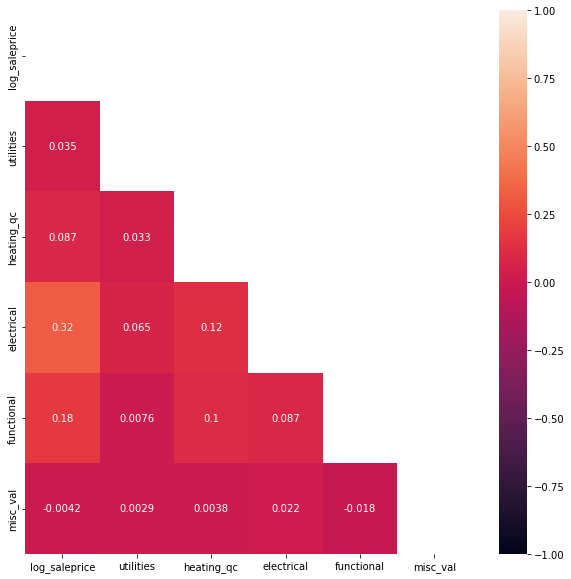

In [107]:
# Examining the remaining misc features
plt.figure(figsize = (10, 10))

corr = misc_df[['log_saleprice', 'utilities', 'heating_qc', 'electrical', 'functional', 'misc_val']].corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask = mask)


None of the remaining misc factors affects the housing sale prices except Electrical, which we will include in the final model. It is also good to note that Misc value has a negligible correlation to sale prices, which supports our earlier decision to drop Misc features. 


In [108]:
misc_df = misc_df[['id', 
                   'log_saleprice', 
                   'age', 
                   'electrical', 
                   'sale_type_New']]


<AxesSubplot:>

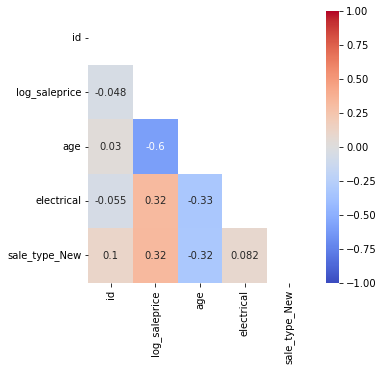

In [109]:
# Examining the remaining misc features
plt.figure(figsize = (5, 5))

corr = misc_df.corr()
                
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = mask)


The primary feature engineering done was the creation of an Age feature, which made room for related year features to be dropped. It is encouraging to note that the engineered Age feature has a moderately high negative linear correlation to housing sale prices. 


In [110]:
# Drop log_saleprice from misc dataframe
misc_df = misc_df[['id',
                   'age', 
                   'electrical', 
                   'sale_type_New']]


<div id="part2summary"></div>

### Part 2 Summary


Section 1 involved preprocessing features for further visualization and engineering. This included removing features with high-modal skewness (Street, Condition 2, Roof material, Heating, Central), scoring relevant nominal features (Neighbourhood, Zoning, Land contour) and categorizaing features based on potential interfacing. 

Section 2 conducted feature engineering using the constructed feature categories and with the aid of visualizations. Through a rigid assessment, a total of 30 predictor variables (including dummies) across the categories were eventually identified. Several noteworthy points include: 
- While there were only three geographical features selected, two have significant influence on housing prices: Neighbourhood (0.72) and Overall quality (0.83).  
- For comparison, parcellation features likewise had a low count of 4 in total, but a much lower score across all features of about 0.3.  
- Internal built environment features were arguably the most prominent, boasting 9 features in total, all of which were within the range of 0.5 to 0.7. 
- In a similar vein, external built environment features accounts for 10 features, albeit a number were non-combined. More importantly, with the exception of Exterior quality (0.69), Total outdoor area (0.61) and Garage cars (0.67), features in this basket had a lower score range of 0.3 to 0.5 relativ to their internal built environment counterparts. 
- For the miscellaneous category, only three features made the cut, with only Age feature attracting more attention given its score of 0.6. 

In summary, dividing the features into the above self-defined categories not only allowed for easier identification of intercollinearity and more conducive feature engineering, but to draw meaningful conclusions on the basket of factors which should take precedence in housing valuation. This is also in part driven by the goal of creating an accessible predictor model, by adopting classifications easily understood by the layperson. Based on our findings, geographical and internal built environment factors likely have the greatest influence on housing prices in Ames, followed closely by external built environment factors. On the contrary, parcellation and miscellaneous factors pale in comparison, except where the age of the house is concerned.  

To close the chapter, the datasets for the respective categories will be merged and verified before exporting for modelling. 


In [111]:
# Merge dataframes
id_price_df = train_clean_df[['id', 'pid', 'saleprice', 'log_saleprice']]


In [112]:
dfs_to_merge = [id_price_df, geog_df, par_df, ibe_df, ebe_df, misc_df]


In [113]:
train_engineer_df = reduce(lambda left, right: pd.merge(left, right, on = ['id'], how = 'outer'), dfs_to_merge)


In [114]:
train_engineer_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2046
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2047 non-null   int64  
 1   pid                                2047 non-null   int64  
 2   saleprice                          2047 non-null   int64  
 3   log_saleprice                      2047 non-null   float64
 4   neighborhood                       2047 non-null   int64  
 5   overall_qual                       2047 non-null   int64  
 6   ms_zoning                          2047 non-null   int64  
 7   ms_subclass_60_house_style_2Story  2047 non-null   uint8  
 8   lot_area                           2047 non-null   int64  
 9   lot_shape                          2047 non-null   int64  
 10  lot_frontage                       2047 non-null   float64
 11  paved_drive                        2047 non-null   int64

In [115]:
train_engineer_df.describe()


,id,pid,saleprice,log_saleprice,neighborhood,overall_qual,ms_zoning,ms_subclass_60_house_style_2Story,lot_area,lot_shape,lot_frontage,paved_drive,gr_liv_area,totrms_abvgrd,kitchen_qual,fireplaces,fireplace_qu,abv_grd_sf,total_bath,below_grd_sf,overall_bsmt_score,exter_qual,total_outdoor_area,garage_cars,overall_garage_score,foundation_PConc,garage_type_Attchd,garage_type_Detchd,roof_style_Hip,exterior_1st_VinylSd,mas_vnr_type_None,age,electrical,sale_type_New
count,2047.000000,2.047000e+03,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.00000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
mean,1473.070347,7.132121e+08,181373.477284,12.023832,2.385931,6.107963,2.921837,0.191500,9900.545188,2.598925,67.456277,1.833415,1495.076209,6.429409,2.515388,0.587689,1.760137,1489.552516,2.435760,1489.852956,8.673669,2.404494,752.635564,1.775769,7.334148,0.451392,0.59062,0.261847,0.192965,0.353688,0.605765,23.629213,3.885198,0.077186
std,844.437406,1.886821e+08,79261.707403,0.411349,1.070148,1.422336,0.618031,0.393578,5239.373634,0.561783,20.848307,0.535264,485.754975,1.544952,0.664439,0.634619,1.807071,482.785258,0.938818,747.852121,3.248280,0.586204,395.873356,0.764587,2.021324,0.497753,0.49184,0.439747,0.394722,0.478231,0.488805,21.017932,0.402838,0.266952
min,1.000000,5.263011e+08,12789.000000,9.456341,1.000000,1.000000,1.000000,0.000000,1300.000000,0.000000,21.000000,0.000000,334.000000,2.000000,1.000000,0.000000,0.000000,334.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,752.500000,5.284581e+08,129650.000000,11.772593,1.000000,5.000000,3.000000,0.000000,7500.000000,2.000000,60.000000,2.000000,1128.000000,5.000000,2.000000,0.000000,0.000000,1124.000000,2.000000,953.500000,6.000000,2.000000,487.500000,1.000000,7.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000
50%,1480.000000,5.354532e+08,162500.000000,11.998433,2.000000,6.000000,3.000000,0.000000,9400.000000,3.000000,63.000000,2.000000,1442.000000,6.000000,2.000000,1.000000,1.000000,1440.000000,2.000000,1405.000000,9.000000,2.000000,698.000000,2.000000,8.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,15.000000,4.000000,0.000000
75%,2199.500000,9.071780e+08,214000.000000,12.273731,3.000000,7.000000,3.000000,0.000000,11500.000000,3.000000,78.000000,2.000000,1728.000000,7.000000,3.000000,1.000000,4.000000,1728.000000,3.000000,1859.000000,11.000000,3.000000,963.500000,2.000000,9.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000,43.000000,4.000000,0.000000
max,2930.000000,9.241520e+08,611657.000000,13.323927,4.000000,10.000000,7.000000,1.000000,70761.000000,3.000000,313.000000,2.000000,3820.000000,14.000000,4.000000,4.000000,5.000000,3820.000000,8.000000,4861.000000,15.000000,4.000000,2863.000000,5.000000,13.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,60.000000,4.000000,1.000000


In [117]:
# Export cleaned dataset for further processing:
train_engineer_df.to_csv('../data/train_engineer.csv', index = False)